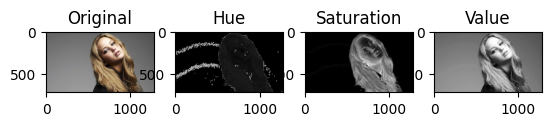

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('(6).jpg')  
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

#plot the 3 image in gray scale
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.subplot(142),plt.imshow(h,'gray'),plt.title('Hue')
plt.subplot(143),plt.imshow(s,'gray'),plt.title('Saturation')
plt.subplot(144),plt.imshow(v,'gray'),plt.title('Value')
plt.show()



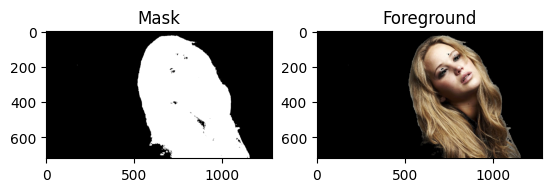

In [67]:
#apply threshold to extract forground mask from plane h
Threshold=15
ret, mask = cv2.threshold(s, Threshold, 128, cv2.THRESH_BINARY)


#plot the mask
plt.subplot(121),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(122),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
plt.show()


#mask1 = cv2.inRange(s, 0, 128)
#plot the mask
#plt.subplot(121),plt.imshow(mask1,'gray'),plt.title('Mask')
#plt.subplot(122),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
#plt.show()




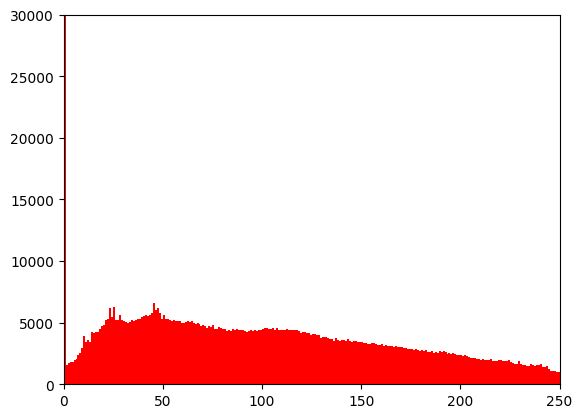

In [68]:

foreground=cv2.bitwise_and(img,img, mask= mask)
#plot the histogram of the foreground
 
hist,bins=np.histogram(foreground.ravel(),256,[0,256])

plt.hist(foreground.flatten(),256,[0,256], color = 'r')
plt.xlim([0,250])
plt.ylim([0,30000])


plt.show()




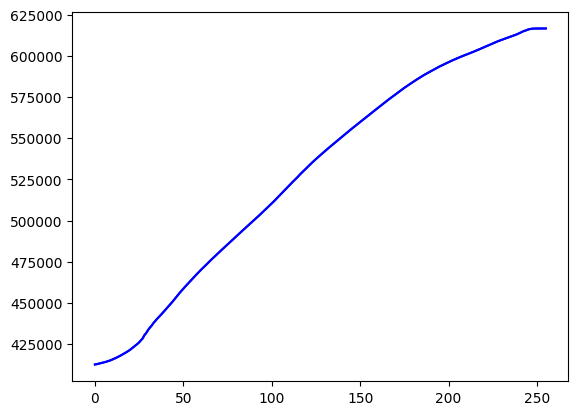

In [44]:
hist,bins = np.histogram(foreground.ravel(),256,[0,256])
cdf = np.cumsum(hist)
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.plot(cdf_normalized, color = 'b')


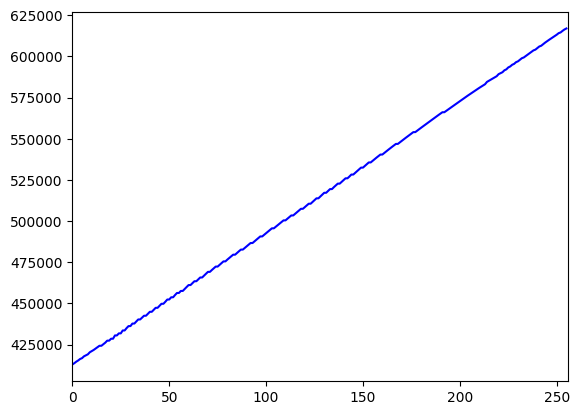

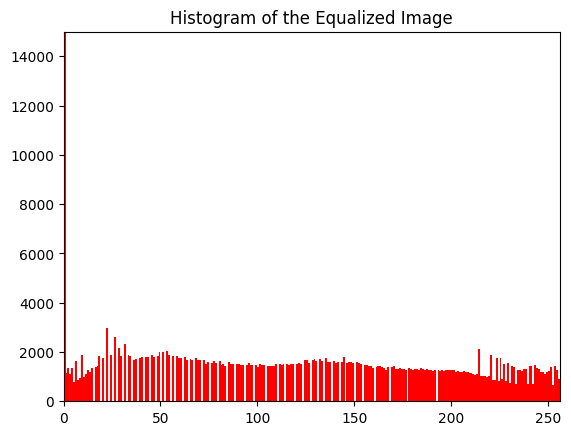

In [47]:
foreground=cv2.bitwise_and(img,img, mask= mask)
#xonvert foreground to gray scale
#foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2GRAY)

equ = cv2.equalizeHist(foreground)



hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.xlim([0,256])
plt.show()

plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.ylim([0,15000])
plt.title('Histogram of the Equalized Image')
plt.show()


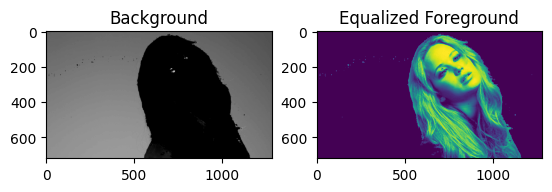

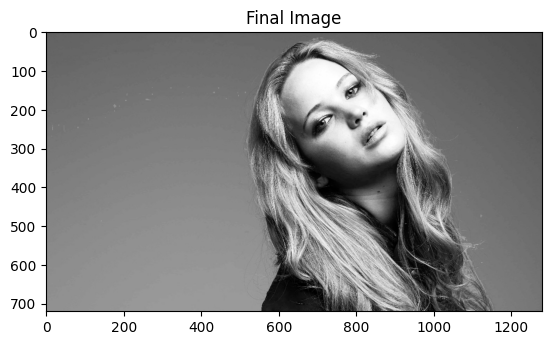

In [57]:
import cv2
Threshold=15
ret, mask = cv2.threshold(s, 11, 1, cv2.THRESH_BINARY)
img=cv2.imread("(6).jpg",0)
#extract background of the original image
mask=1-mask
img_back=cv2.bitwise_and(img,img,mask=mask)


#plot the background
plt.subplot(121),plt.imshow(img_back,cmap="gray",vmin=0,vmax=255),plt.title('Background')
#plt.subplot(132),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
plt.subplot(122),plt.imshow(equ),plt.title('Equalized Foreground')
plt.show()
#add this to the equalized foreground
final=cv2.add(equ,img_back)
#convert to rgb
final=cv2.cvtColor(final,cv2.COLOR_GRAY2RGB)
#display the final image
plt.imshow(final),plt.title('Final Image')
plt.show()


